### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: **Code Basics**


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import pandas library
import pandas as pd
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df

df=pd.read_csv("/content/drive/MyDrive/Fake_Real_Data.csv")

#print the shape of dataframe
print(f"Shape of datast: \n {df.shape}")

#print top 5 rows
print(f"Top 5 rows of dataset: \n{df.head()}")

Shape of datast: 
 (9900, 2)
Top 5 rows of dataset: 
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real


In [3]:
#check the distribution of labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels
dict={"Fake":0,
      "Real":1}
df["label_new"] = df['label'].map(dict)

#check the results with top 5 rows
df.head()

,Text,label,label_new
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### **Modelling without Pre-processing Text data**

In [5]:
#import train-test-split from sklearn

from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too

X_train,X_test,y_train,y_test=train_test_split(df.Text,df.label_new,test_size=0.2,random_state=2022)


In [16]:
#print the shapes of X_train and X_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(7920,)
(7920,)
(1980,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Load a sample dataset
X=df["Text"]
y=df["label_new"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline object with properly defined steps
clf = Pipeline([
    ("count_vectorizer", CountVectorizer(ngram_range=(1, 3))),
    ("knn_model", KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

# Fit the model using the training data
clf.fit(X_train, y_train)

# Get the predictions for the test data
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.46      0.62      1466
           1       0.65      0.98      0.78      1504

    accuracy                           0.72      2970
   macro avg       0.81      0.72      0.70      2970
weighted avg       0.81      0.72      0.70      2970



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [8]:
# Load a sample dataset
X=df["Text"]
y=df["label_new"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#1. create a pipeline object

clf = Pipeline([
    ("count vectorizer",CountVectorizer(ngram_range=(1,3))),
    ("KNN Model",KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])


#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred=clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      1466
           1       0.70      1.00      0.82      1504

    accuracy                           0.78      2970
   macro avg       0.85      0.78      0.77      2970
weighted avg       0.85      0.78      0.77      2970




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [9]:
#1. create a pipeline object
from sklearn.ensemble import RandomForestClassifier
clf=Pipeline([
    ("count vectorizer",CountVectorizer(ngram_range=(3,3))),
    ("Randome forest model",RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred=clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1466
           1       0.99      1.00      0.99      1504

    accuracy                           0.99      2970
   macro avg       0.99      0.99      0.99      2970
weighted avg       0.99      0.99      0.99      2970




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [10]:

#1. create a pipeline object
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([
    ("count vectorizer",CountVectorizer(ngram_range=(1,2))),
    ("Naice Bays Model",MultinomialNB(alpha=0.75))
])


#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1466
           1       0.98      0.99      0.99      1504

    accuracy                           0.99      2970
   macro avg       0.99      0.99      0.99      2970
weighted avg       0.99      0.99      0.99      2970



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [11]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [12]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient

df['Preprocessed Text'] = df['Text'].apply(preprocess)


In [20]:
#print the top 5 rows
df.head()

,Text,label,label_new,Preprocessed Text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


**Build a model with pre processed text**

In [14]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting

X=df['Preprocessed Text']
y=df['label_new']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2022)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [15]:
#1. create a pipeline object

clf=Pipeline([
    ("count vectorizer",CountVectorizer(ngram_range=(3,3))),
    ("Random forest clasifier",RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

y_pred=clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1024
           1       0.99      0.92      0.95       956

    accuracy                           0.95      1980
   macro avg       0.96      0.95      0.95      1980
weighted avg       0.96      0.95      0.95      1980



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [17]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter
    ('random_forest', (RandomForestClassifier()))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1024
           1       1.00      0.99      1.00       956

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

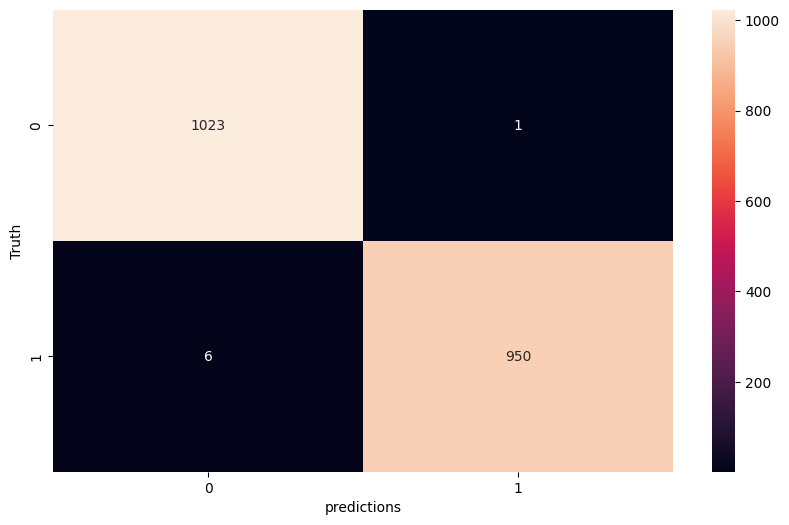

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predictions")
plt.ylabel("Truth")